# UCI Adult Income Dataset - Exploratory and Descriptive Analysis

this notebook is focused on exploratory and descriptive of cleaned version of UCI adult Income Dataset.

In [1]:
# Import libraries 
import os
import pandas as pd
import numpy as np
import plotly.express as px

## Define and Create Paths

In [3]:
#Get working directory
current_dir = os.getcwd()
#go one directory up to root directory
project_root_dir = os.path.dirname(current_dir)
#Define path to data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
#Define path to results folder
results_dir = os.path.join(project_root_dir, 'results')
#Define path to results folder
docs_dir = os.path.join(project_root_dir, 'docs')

#Create directories if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

## Read in the Data

In [5]:
adult_data_filename = os.path.join(processed_dir, "1.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_grouped,native_region,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,married or separated,single,black,female,0,0,16,<=50k,secondary,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary-school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


In [7]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'education_level', 'occupation_grouped',
       'native_region', 'age_group'],
      dtype='object')

## Check the shape of the dataset and datatyppes 

In [9]:
adult_df.shape

(32513, 16)

In [11]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32513 non-null  int64 
 1   workclass           32513 non-null  object
 2   fnlwgt              32513 non-null  int64 
 3   education_num       32513 non-null  int64 
 4   marital_status      32513 non-null  object
 5   relationship        32513 non-null  object
 6   race                32513 non-null  object
 7   sex                 32513 non-null  object
 8   capital_gain        32513 non-null  int64 
 9   capital_loss        32513 non-null  int64 
 10  hours_per_week      32513 non-null  int64 
 11  income              32513 non-null  object
 12  education_level     32513 non-null  object
 13  occupation_grouped  32513 non-null  object
 14  native_region       32513 non-null  object
 15  age_group           32513 non-null  object
dtypes: int64(6), object(10

## Summary Statistics
### Numerica Variables

In [13]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_grouped,native_region,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,6,5,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,secondary-school graduate,white collar,north america,26-35
freq,22650,14984,13178,27771,21758,24677,10484,16532,30018,8501


In [17]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
government       0.133793
self-employed    0.112447
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [19]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460862
single                   0.327684
divorced or separated    0.168056
widowed                  0.030542
married or separated     0.012856
Name: proportion, dtype: float64

In [21]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [23]:
adult_df['race'].value_counts(normalize=True)

race
white                        0.854151
black                        0.096023
asian or pacific islander    0.031926
american indian or eskimo    0.009565
other                        0.008335
Name: proportion, dtype: float64

## Income Distribution

In [25]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


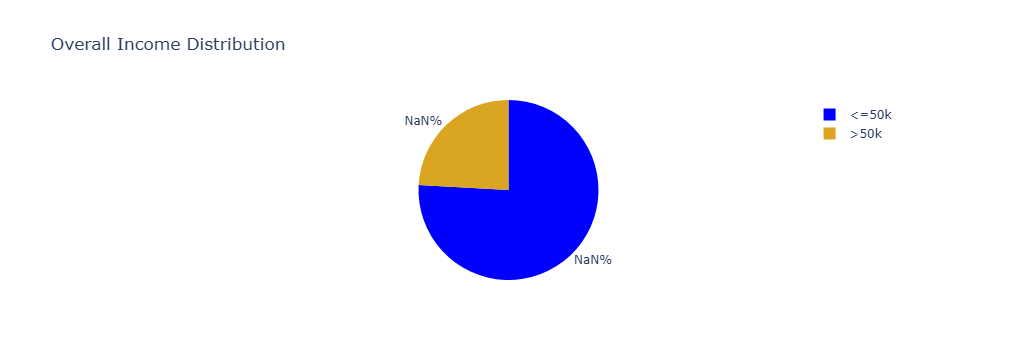

In [27]:
fig = px.pie(adult_df_income, names='income', values='total', title='Overall Income Distribution', color_discrete_sequence=['blue', 'goldenrod'])
fig.update_layout(paper_bgcolor = "rgba(0, 0, 0, 0)",plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.update_traces(texttemplate = "%{text:.2f}%",textposition="outside")
fig.show()
fig.write_image(os.path.join(results_dir, 'Income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'Income_distribution_pie_chart.html'))

## Income by Age Group

In [28]:
adult_df_income_age = adult_df.groupby(['age_group', 'income']).size().reset_index(name="total_by_age").sort_values(by='total_by_age',ascending=False)
adult_df_income_age

,age_group,income,total_by_age
2,26-35,<=50k,6910
0,18-25,<=50k,5333
4,36-45,<=50k,5230
6,46-60,<=50k,4479
7,46-60,>50k,2809
5,36-45,>50k,2771
3,26-35,>50k,1591
8,61-75,<=50k,1580
12,<18,<=50k,945
9,61-75,>50k,511


In [31]:
total_per_group = adult_df_income_age.groupby('age_group')['total_by_age'].transform("sum")
adult_df_income_age["percentage"]=(adult_df_income_age["total_by_age"]/total_per_group)*100
adult_df_income_age

,age_group,income,total_by_age,percentage
2,26-35,<=50k,6910,81.284555
0,18-25,<=50k,5333,97.907105
4,36-45,<=50k,5230,65.366829
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
5,36-45,>50k,2771,34.633171
3,26-35,>50k,1591,18.715445
8,61-75,<=50k,1580,75.561932
12,<18,<=50k,945,100.000000
9,61-75,>50k,511,24.438068


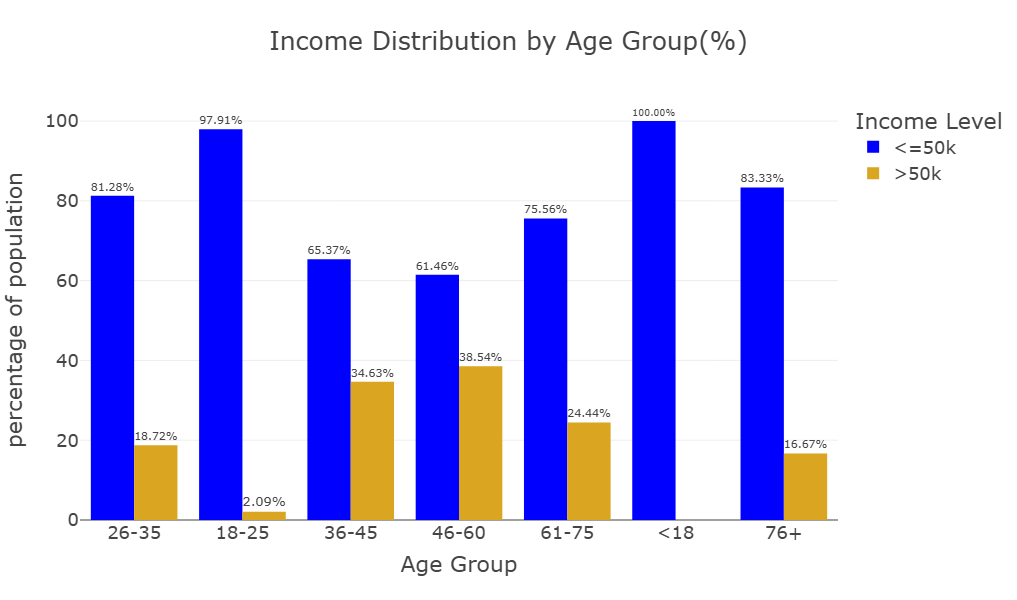

In [35]:
fig = px.bar(
    adult_df_income_age,
    x = 'age_group',
    y = 'percentage',
    color = 'income',
    title='Income Distribution by Age Group(%)',
    barmode='group',
    height= 600,
    width=1000,
    color_discrete_sequence = ['blue', 'goldenrod'],
    text = 'percentage'
)
fig.update_layout(template = "presentation",xaxis_title="Age Group",
                  yaxis_title="percentage of population",
                  legend_title=dict(text="Income Level"),
                paper_bgcolor = "rgba(0, 0, 0, 0)",plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.update_traces(texttemplate = "%{text:.2f}%",textposition="outside")
fig.show()
fig.write_image(os.path.join(results_dir, 'Income_distribution_by_Age_bar_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Income_distribution_by_Age_bar_chart.png'))
fig.write_html(os.path.join(results_dir, 'Income_distribution_by_Age_bar_chart.html'))

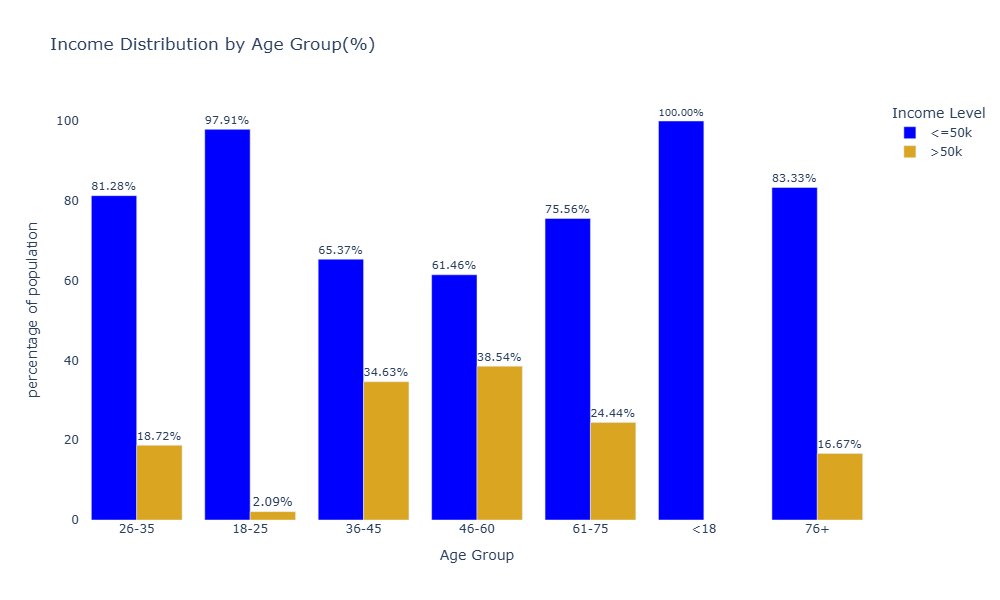

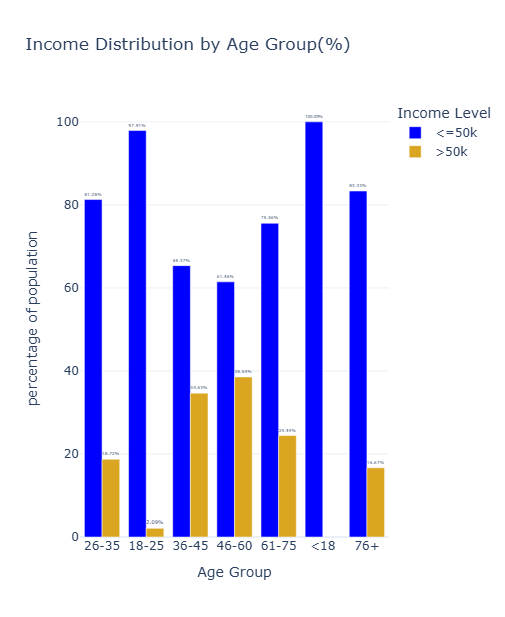

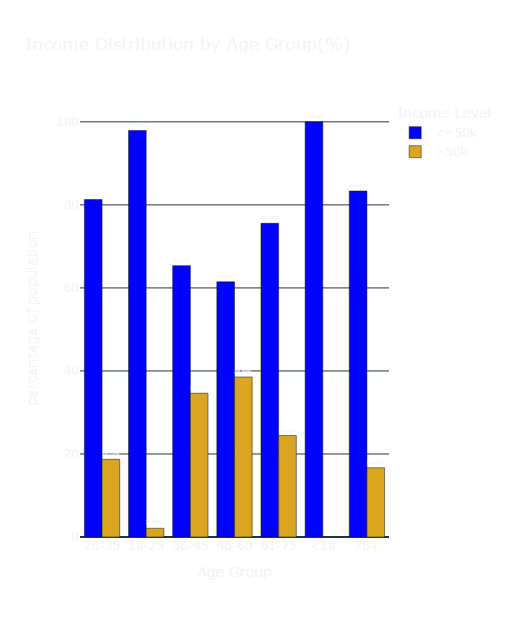

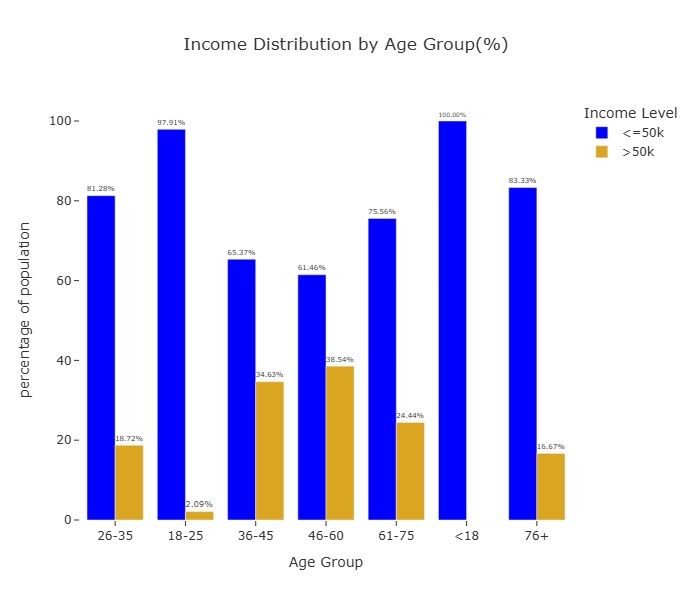

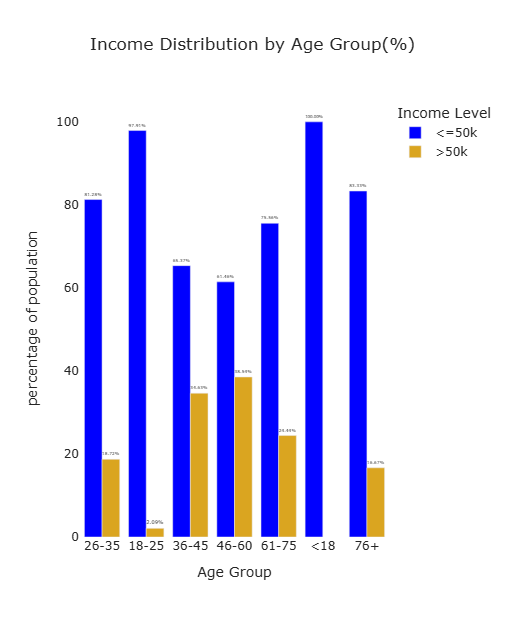

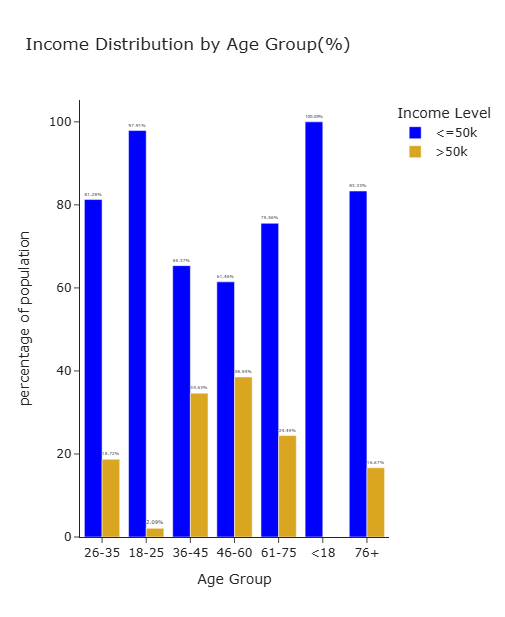

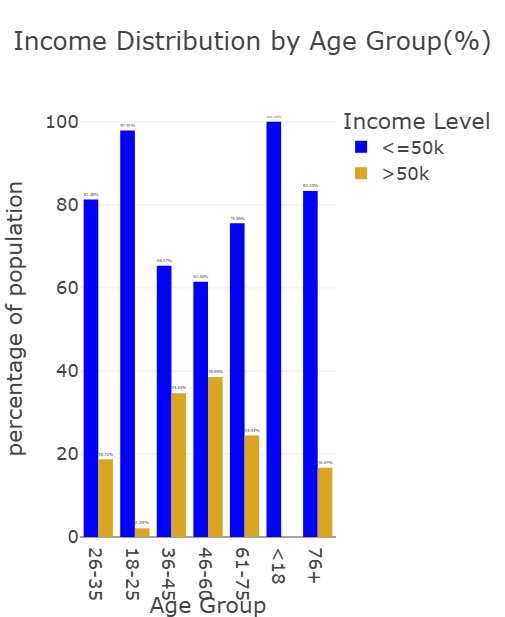

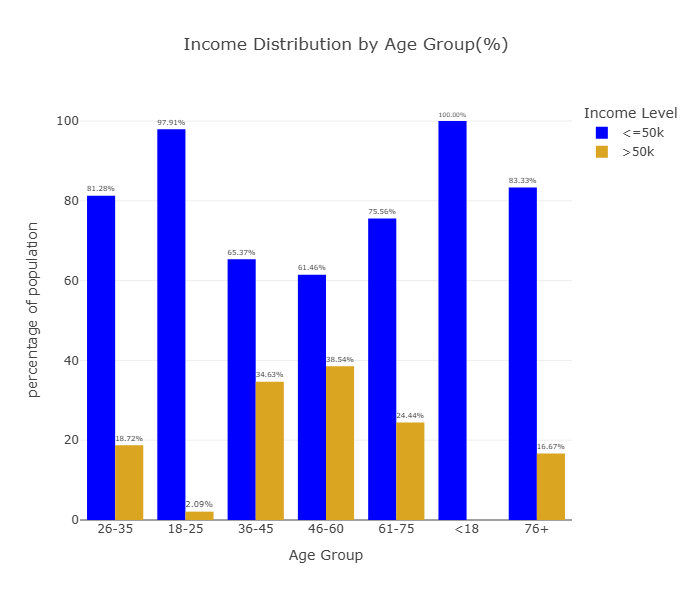

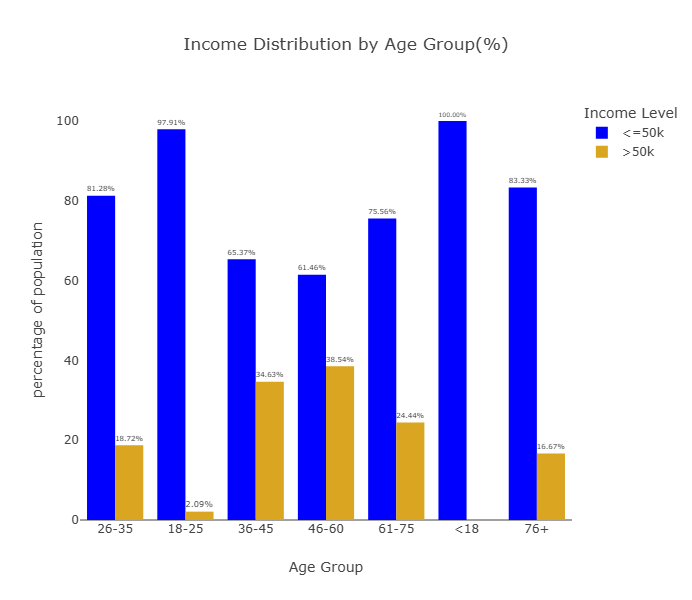

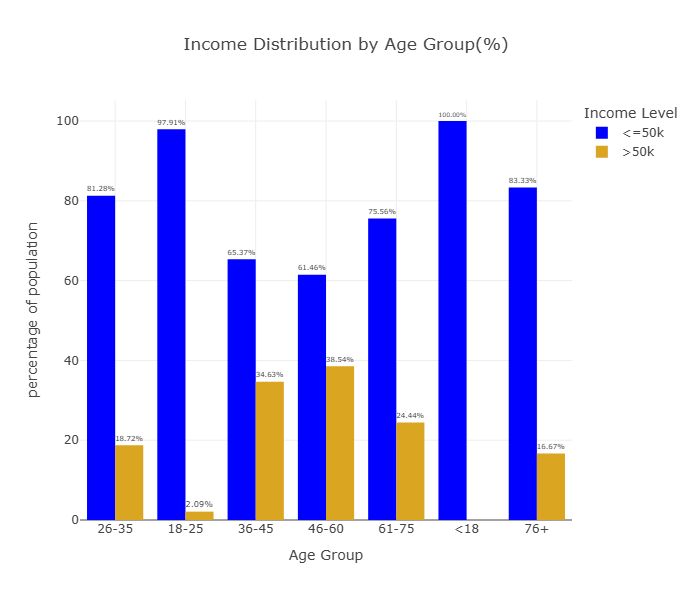

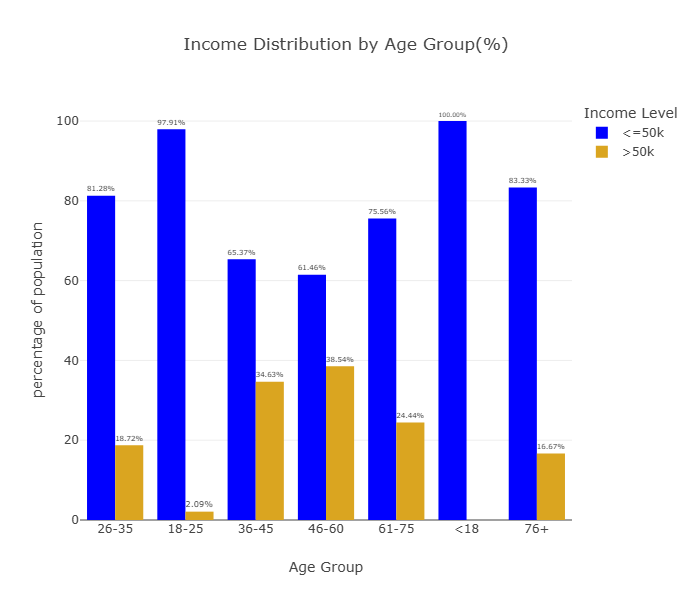

In [37]:
themes = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white",
         "presentation", "xgridoff", "ygridoff", "gridon", "none"]
for theme in themes:
    fig.update_layout(template=theme)
    fig.show()

In [37]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install -U plotly

Note: you may need to restart the kernel to use updated packages.


### Income by `Native Region`

In [39]:
adult_df_income_native_region = adult_df.groupby(['native_region', 'income']).size().reset_index(name='total_income_distr')
adult_df_income_native_region

,native_region,income,total_income_distr
0,asia,<=50k,465
1,asia,>50k,206
2,central america,<=50k,466
3,central america,>50k,58
4,europe,<=50k,369
5,europe,>50k,152
6,north america,<=50k,22768
7,north america,>50k,7250
8,other,<=50k,435
9,other,>50k,146


In [41]:
total_per_native_region = adult_df_income_native_region.groupby("native_region")["total_income_distr"].transform("sum")
adult_df_income_native_region["percentage"] = (adult_df_income_native_region["total_income_distr"] / total_per_native_region) * 100
adult_df_income_native_region

,native_region,income,total_income_distr,percentage
0,asia,<=50k,465,69.299553
1,asia,>50k,206,30.700447
2,central america,<=50k,466,88.931298
3,central america,>50k,58,11.068702
4,europe,<=50k,369,70.825336
5,europe,>50k,152,29.174664
6,north america,<=50k,22768,75.847825
7,north america,>50k,7250,24.152175
8,other,<=50k,435,74.870912
9,other,>50k,146,25.129088


In [43]:
total_per_native_region

0       671
1       671
2       524
3       524
4       521
5       521
6     30018
7     30018
8       581
9       581
10      198
11      198
Name: total_income_distr, dtype: int64

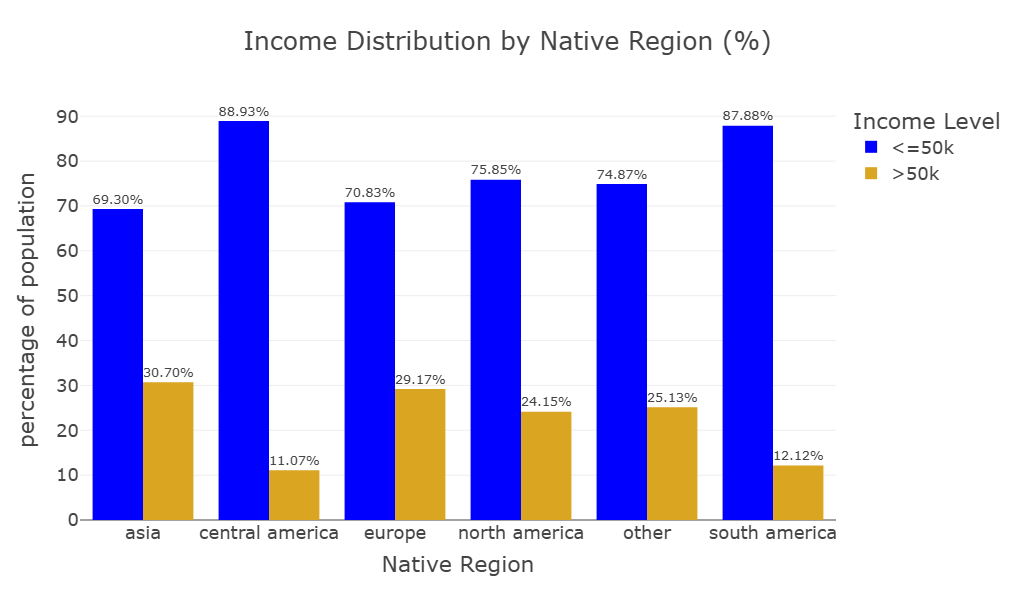

In [45]:
fig = px.bar(
    adult_df_income_native_region,  
    x = "native_region",     
    y = "percentage",
    color = "income",
    title ="Income Distribution by Native Region (%)",
    barmode="group",
    height= 600,
    width= 1000,
    color_discrete_sequence=['blue', 'goldenrod'],
    text="percentage"
)
fig.update_layout(template = "presentation",xaxis_title="Native Region",
                  yaxis_title="percentage of population",
                  legend_title=dict(text="Income Level"),
                paper_bgcolor = "rgba(0, 0, 0, 0)",plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.update_traces(texttemplate = "%{text:.2f}%",textposition="outside")
fig.show()
fig.write_image(os.path.join(results_dir, 'Income_distribution_by_Native_Region_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Income_distribution_by_Native_Region_chart.png'))
fig.write_html(os.path.join(results_dir, 'Income_distribution_by_Native_Region_chart.html'))

### Income by Race

In [47]:
adult_df_income_race = adult_df.groupby(['race', 'income']).size().reset_index(name='total_income')
adult_df_income_race

,race,income,total_income
0,american indian or eskimo,<=50k,275
1,american indian or eskimo,>50k,36
2,asian or pacific islander,<=50k,762
3,asian or pacific islander,>50k,276
4,black,<=50k,2735
5,black,>50k,387
6,other,<=50k,246
7,other,>50k,25
8,white,<=50k,20659
9,white,>50k,7112


In [49]:
total_per_race = adult_df_income_race.groupby("race")["total_income"].transform("sum")
adult_df_income_race["percentage"] = (adult_df_income_race["total_income"] / total_per_race) * 100
adult_df_income_race

,race,income,total_income,percentage
0,american indian or eskimo,<=50k,275,88.424437
1,american indian or eskimo,>50k,36,11.575563
2,asian or pacific islander,<=50k,762,73.410405
3,asian or pacific islander,>50k,276,26.589595
4,black,<=50k,2735,87.604100
5,black,>50k,387,12.395900
6,other,<=50k,246,90.774908
7,other,>50k,25,9.225092
8,white,<=50k,20659,74.390551
9,white,>50k,7112,25.609449


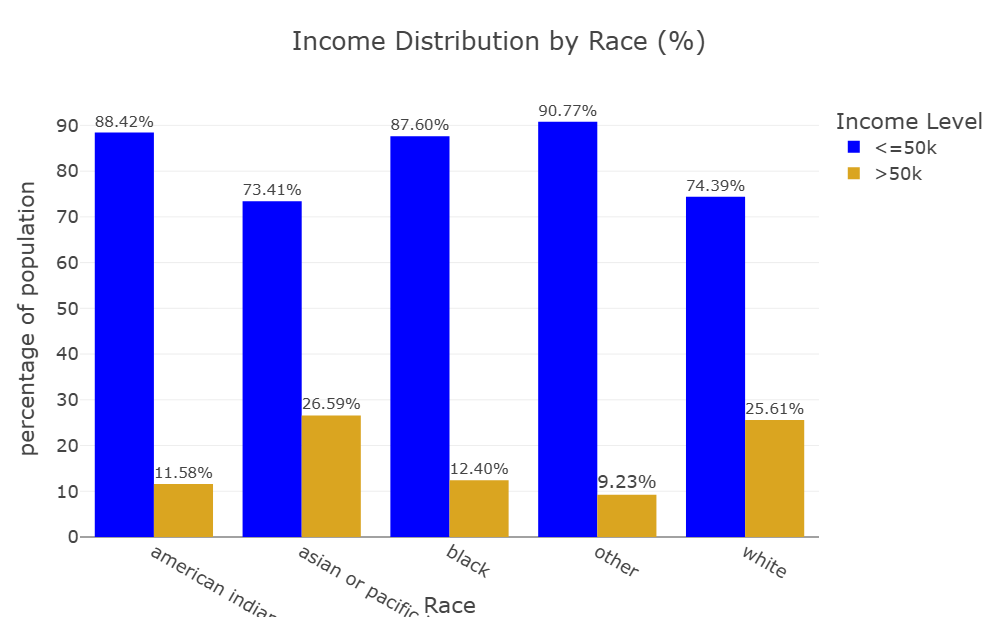

In [63]:
fig = px.bar(
    adult_df_income_race,  
    x = "race",   
    y = "percentage",
    color = "income",
    title ="Income Distribution by Race (%)",
    barmode="group",
    height= 600,
    width= 1000,
    color_discrete_sequence = ['blue', 'goldenrod'],
    text = "percentage"
)
fig.update_layout(template = "presentation",xaxis_title="Race",
                  yaxis_title="percentage of population",
                  legend_title=dict(text="Income Level"),
                paper_bgcolor = "rgba(0, 0, 0, 0)",plot_bgcolor = "rgba(0, 0, 0, 0)")
fig.update_traces(texttemplate = "%{text:.2f}%",textposition="outside")
fig.show()
fig.write_image(os.path.join(results_dir, 'Income_distribution_by_Race_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Income_distribution_by_Race_chart.png'))
fig.write_html(os.path.join(results_dir, 'Income_distribution_by_Race_chart.html'))

In [55]:
adult_df_income_edu_occ = (adult_df.groupby(['education_level', 'occupation_grouped', 'income']).size().reset_index(name = 'total'). sort_values('total', ascending=False))
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total
29,secondary-school graduate,blue collar,<=50k,3976
56,tertiary,white collar,>50k,3545
55,tertiary,white collar,<=50k,3369
45,some college,white collar,<=50k,3003
36,secondary-school graduate,white collar,<=50k,2900
38,some college,blue collar,<=50k,1503
32,secondary-school graduate,service,<=50k,1444
20,secondary,blue collar,<=50k,1349
6,associate,white collar,<=50k,1015
41,some college,service,<=50k,902


In [57]:
adult_df_income_edu_occ['edu_occ'] = (adult_df_income_edu_occ['education_level'] + " | " 
                                     + adult_df_income_edu_occ['occupation_grouped'])
adult_df_income_edu_occ

,education_level,occupation_grouped,income,total,edu_occ
29,secondary-school graduate,blue collar,<=50k,3976,secondary-school graduate | blue collar
56,tertiary,white collar,>50k,3545,tertiary | white collar
55,tertiary,white collar,<=50k,3369,tertiary | white collar
45,some college,white collar,<=50k,3003,some college | white collar
36,secondary-school graduate,white collar,<=50k,2900,secondary-school graduate | white collar
38,some college,blue collar,<=50k,1503,some college | blue collar
32,secondary-school graduate,service,<=50k,1444,secondary-school graduate | service
20,secondary,blue collar,<=50k,1349,secondary | blue collar
6,associate,white collar,<=50k,1015,associate | white collar
41,some college,service,<=50k,902,some college | service


In [59]:
adult_df_income_edu_occ.head(15)

,education_level,occupation_grouped,income,total,edu_occ
29,secondary-school graduate,blue collar,<=50k,3976,secondary-school graduate | blue collar
56,tertiary,white collar,>50k,3545,tertiary | white collar
55,tertiary,white collar,<=50k,3369,tertiary | white collar
45,some college,white collar,<=50k,3003,some college | white collar
36,secondary-school graduate,white collar,<=50k,2900,secondary-school graduate | white collar
38,some college,blue collar,<=50k,1503,some college | blue collar
32,secondary-school graduate,service,<=50k,1444,secondary-school graduate | service
20,secondary,blue collar,<=50k,1349,secondary | blue collar
6,associate,white collar,<=50k,1015,associate | white collar
41,some college,service,<=50k,902,some college | service


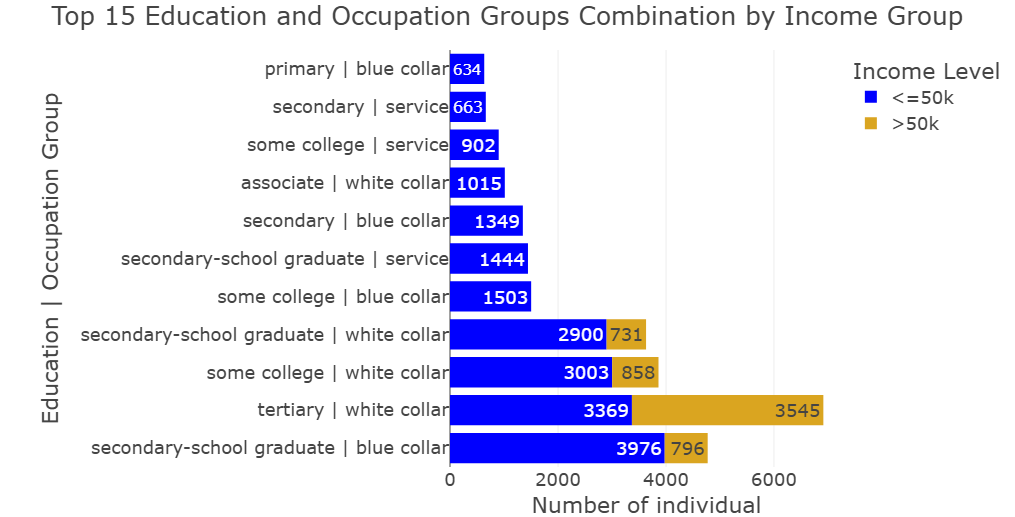

In [74]:
num = 15
adult_df_combos =  adult_df_income_edu_occ.head(num)
fig = px.bar(
    adult_df_combos,
    x = 'total',
    y= 'edu_occ',
    color='income',
    orientation = 'h',
    title=f'Top {num} Education and Occupation Groups Combination by Income Group',
    #barmode='group',
    height=500,
    width=1100,
    color_discrete_sequence=['blue', 'goldenrod'],
    text='total'
)
 
fig.update_layout(template="presentation", 
                  xaxis_title='Number of individual', 
                  yaxis_title='Education | Occupation Group',
                  legend_title=dict(text = 'Income Level'),
                  margin=dict(l=450 ,r=50, t=50, b=50), paper_bgcolor = "rgba(0,0,0,0)", plot_bgcolor = "rgba(0,0,0,0)") 
fig.update_traces(textposition='inside')
fig.show()
fig.write_image(os.path.join(results_dir,'income_distribution_by Educ_occ_plot.jpg'))
fig.write_image(os.path.join(results_dir,'income_distribution_by Educ_occ_plot.png'))
fig.write_html(os.path.join(results_dir,'income_distribution_by Educ_occ_plot.html'))

### Income Distribution

In [76]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


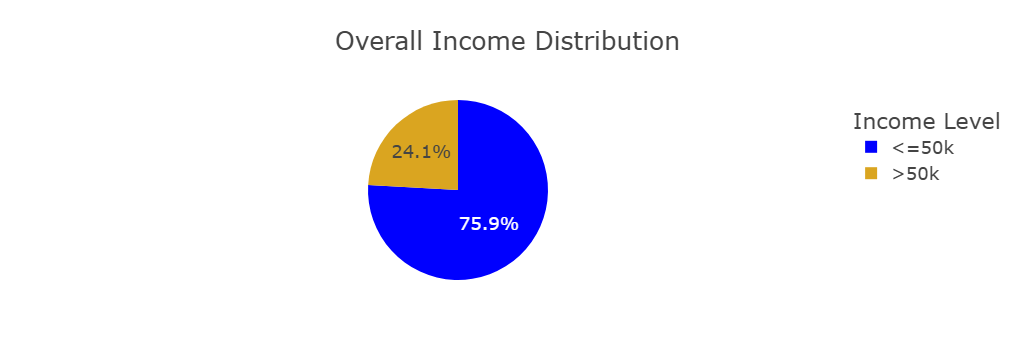

In [80]:
fig = px.pie(
    adult_df_income,
    names="income",
    values="total",
    title="Overall Income Distribution",
    color_discrete_sequence=['blue', 'goldenrod']
)

fig.update_layout(
    template="presentation",
    legend_title_text='Income Level'
)

fig.show()

fig.write_image(os.path.join(results_dir, 'Overall_income_distribution_pie_chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Overall_income_distribution_pie_chart.png'))
fig.write_html(os.path.join(results_dir, 'Overall_income_distribution_pie_chart.html'))